In [1]:
from sklearn import metrics
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import unique
from numpy import where
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

pyplot.style.use('ggplot')


def clustering_algorithm_info(clusters, clusterd_label, method_name, n_clusters_, labels_true):
    clustering_plot(clusters, clusterd_label, title=method_name)
    cluster_analysis(X, n_clusters_, labels_true, clusterd_label, method_name)


def clustering_plot(clusters, yhat, title):
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.title(title)
    pyplot.show()


def cluster_analysis(X, n_clusters_, labels_true, clustered_labels, method_name):
    print("===================================================================")
    print(f"cluster analysis for method of {method_name}")
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clustered_labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clustered_labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, clustered_labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, clustered_labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, clustered_labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, clustered_labels))
    print(f"========================== end of {method_name} method =========================")


from yellowbrick.cluster import KElbowVisualizer


def internal_clustering_analysis(model, X):
    visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
    visualizer.fit(X)  # Fit data to visualizer
    visualizer.show()  # Finalize and render figure

    visualizer = KElbowVisualizer(model, k=(2, 30), metric='silhouette', timings=True)
    visualizer.fit(X)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

    visualizer = KElbowVisualizer(model, k=(2, 30), metric='calinski_harabasz', timings=True)
    visualizer.fit(X)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure


def affinity_propagation_clustering(X, labels_true, damping):
    model = AffinityPropagation(damping=damping)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    method_name = "AffinityPropagation Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def agglomerative_clustering(X, labels_true, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    # fit model and predict clusters
    internal_clustering_analysis(model, X)
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    method_name = "Agglomerative Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def birch_clustering(X, labels_true, threshold, n_clusters):
    model = Birch(threshold=threshold, n_clusters=n_clusters)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    method_name = "Birch Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def dbscan_clustering(X, labels_true, eps, min_samples):
    # define the model
    model = DBSCAN(eps=eps, min_samples=min_samples)
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    method_name = "DBSCAN Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def kmeans_clustering(X, labels_true, n_clusters):
    model = KMeans(n_clusters=n_clusters)
    # fit the model
    model.fit(X)
    internal_clustering_analysis(model, X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    method_name = "KMeans Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def mini_batch_kmeans_clustering(X, labels_true, n_clusters):
    # define the model
    model = MiniBatchKMeans(n_clusters=n_clusters)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    method_name = "MiniBatchKMeans Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def mean_shift_clustering(X, labels_true):
    model = MeanShift()
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    method_name = "MeanShift Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def optics_clustering(X, labels_true, eps, min_samples):
    # define the model
    model = OPTICS(eps=eps, min_samples=min_samples)
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    method_name = "Optics Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


# spectral clustering
def spectral_clustering(X, labels_true, n_clusters):
    model = SpectralClustering(n_clusters=n_clusters)
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)

    method_name = "Spectral Clustering"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels


def gaussian_mixture_clustering(X, labels_true, n_components):
    model = GaussianMixture(n_components=n_components)
    # fit the model
    model.fit(X)

    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    method_name = "Gaussian Mixture Model"
    clustered_labels = yhat
    n_clusters_ = len(clusters)
    clustering_algorithm_info(clusters, clustered_labels, method_name, n_clusters_, labels_true)

    return n_clusters_, clustered_labels





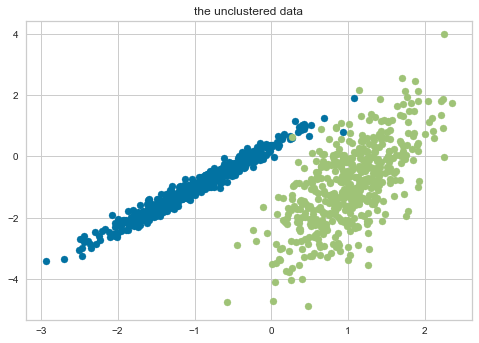

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title("the unclustered data")
pyplot.show()



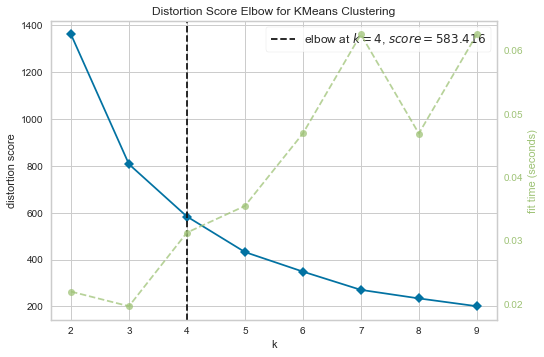

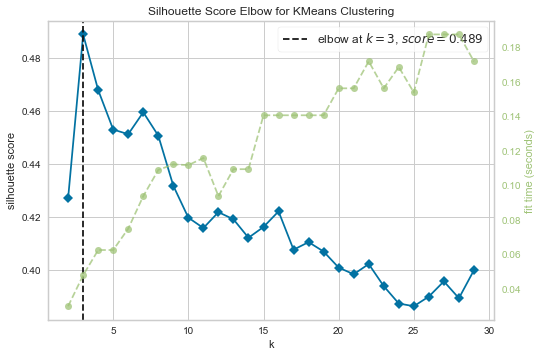

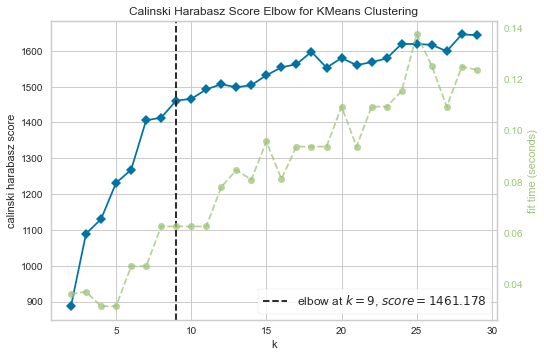

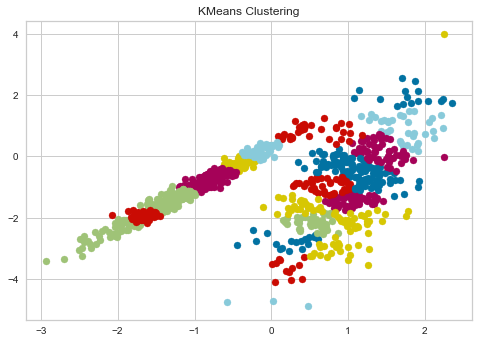

cluster analysis for method of KMeans Clustering
Estimated number of clusters: 29
Homogeneity: 0.980
Completeness: 0.214
V-measure: 0.351
Adjusted Rand Index: 0.092
Adjusted Mutual Information: 0.346
Silhouette Coefficient: 0.383
========================== end of KMeans Clustering method =========================


In [3]:
# define kmeans clustering
kmeans_clusters, kmeans_predicted_label = kmeans_clustering(X, y, n_clusters=2)


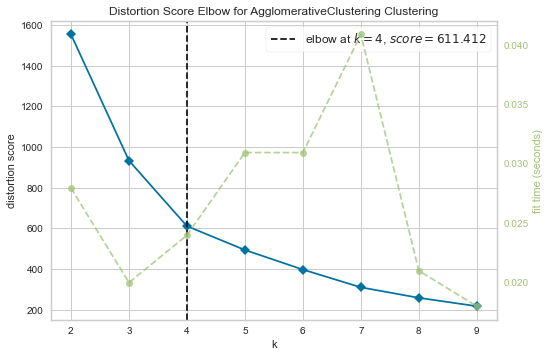

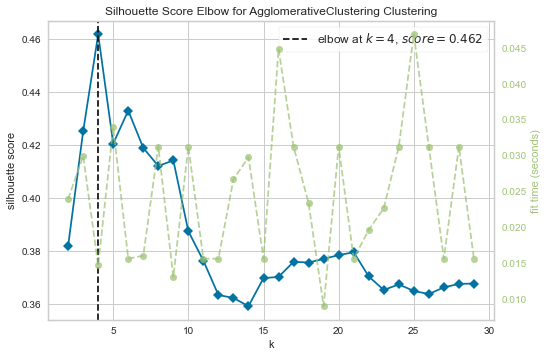

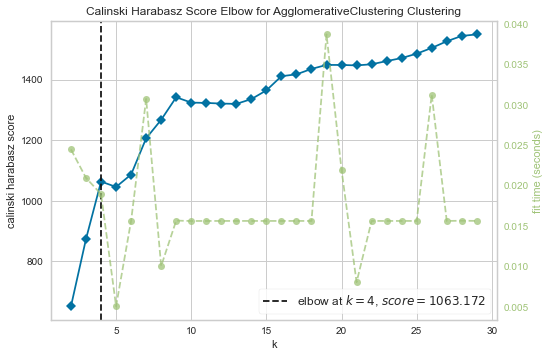

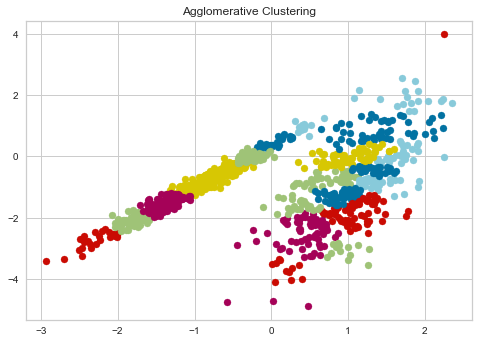

cluster analysis for method of Agglomerative Clustering
Estimated number of clusters: 29
Homogeneity: 0.982
Completeness: 0.213
V-measure: 0.351
Adjusted Rand Index: 0.090
Adjusted Mutual Information: 0.346
Silhouette Coefficient: 0.368
========================== end of Agglomerative Clustering method =========================


In [4]:
# define agglomerative clustering
agglomerative_clusters, agglomerative_predicted_label = agglomerative_clustering(X, y, n_clusters=2)



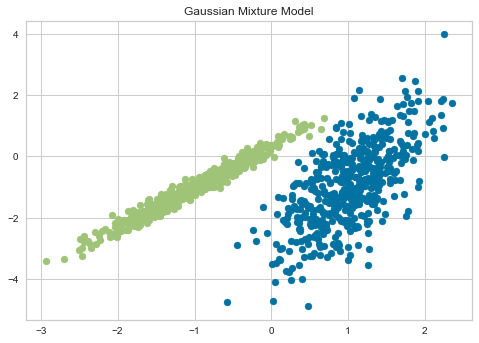

cluster analysis for method of Gaussian Mixture Model
Estimated number of clusters: 2
Homogeneity: 0.962
Completeness: 0.962
V-measure: 0.962
Adjusted Rand Index: 0.984
Adjusted Mutual Information: 0.962
Silhouette Coefficient: 0.430
========================== end of Gaussian Mixture Model method =========================


In [5]:
# define gaussian mixture clustering
gaussian_mixture_clusters, gaussian_mixture_predicted_label = gaussian_mixture_clustering(X, y, n_components=2)


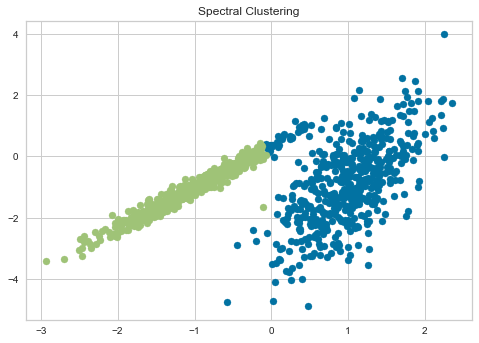

cluster analysis for method of Spectral Clustering
Estimated number of clusters: 2
Homogeneity: 0.792
Completeness: 0.795
V-measure: 0.793
Adjusted Rand Index: 0.850
Adjusted Mutual Information: 0.793
Silhouette Coefficient: 0.440
========================== end of Spectral Clustering method =========================


In [6]:
#define spectral_clustering
spectral_clusters, spectral_predicted_label = spectral_clustering(X, y, n_clusters=2)


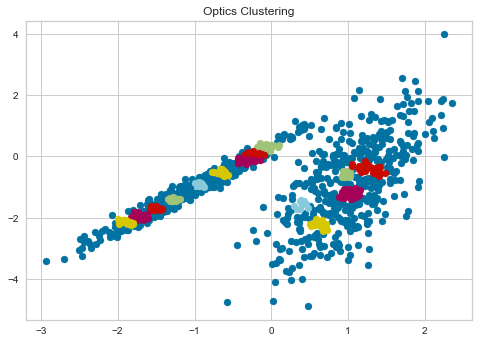

cluster analysis for method of Optics Clustering
Estimated number of clusters: 17
Homogeneity: 0.306
Completeness: 0.150
V-measure: 0.201
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.195
Silhouette Coefficient: -0.364
========================== end of Optics Clustering method =========================


In [7]:
# define optics clustering
optics_clusters, optics_predicted_label = optics_clustering(X, y, eps=0.8, min_samples=10)


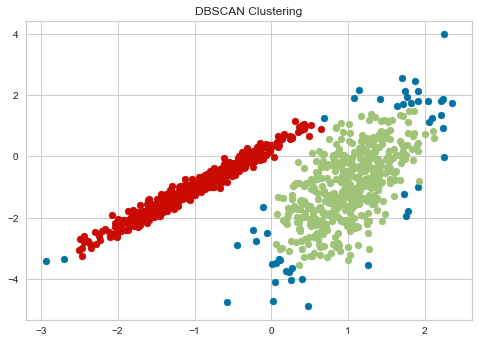

cluster analysis for method of DBSCAN Clustering
Estimated number of clusters: 3
Homogeneity: 0.951
Completeness: 0.774
V-measure: 0.854
Adjusted Rand Index: 0.900
Adjusted Mutual Information: 0.853
Silhouette Coefficient: 0.423
========================== end of DBSCAN Clustering method =========================


In [8]:
# define dbscan clustering
dbscan_clusters, dbscan_predicted_label = dbscan_clustering(X, y, eps=0.3, min_samples=9)


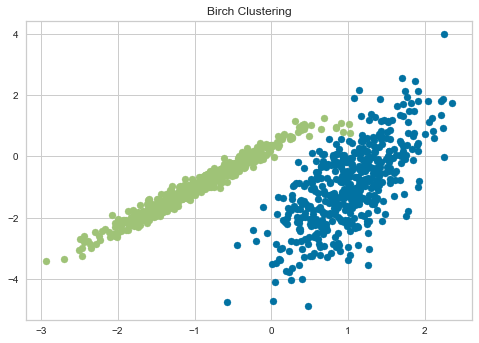

cluster analysis for method of Birch Clustering
Estimated number of clusters: 2
Homogeneity: 0.936
Completeness: 0.936
V-measure: 0.936
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.936
Silhouette Coefficient: 0.424
========================== end of Birch Clustering method =========================


In [9]:
# define birch clustering
birch_clusters, birch_predicted_label = birch_clustering(X, y, threshold=0.01, n_clusters=2)


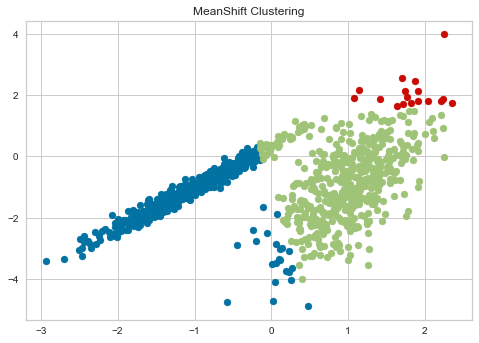

cluster analysis for method of MeanShift Clustering
Estimated number of clusters: 3
Homogeneity: 0.643
Completeness: 0.581
V-measure: 0.611
Adjusted Rand Index: 0.718
Adjusted Mutual Information: 0.610
Silhouette Coefficient: 0.399
========================== end of MeanShift Clustering method =========================


In [10]:
# define mean shift clustering
mean_shift_clusters, mean_shift_predicted_label = mean_shift_clustering(X, y)


C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


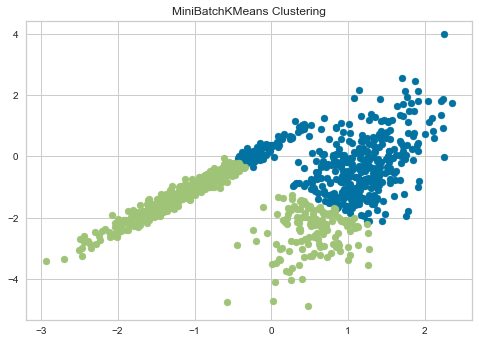

cluster analysis for method of MiniBatchKMeans Clustering
Estimated number of clusters: 2
Homogeneity: 0.218
Completeness: 0.220
V-measure: 0.219
Adjusted Rand Index: 0.282
Adjusted Mutual Information: 0.218
Silhouette Coefficient: 0.422
========================== end of MiniBatchKMeans Clustering method =========================


In [11]:
# define mini_batch kmeans clustering
mini_batch_kmeans_clusters, mini_batch_kmeans_predicted_label = mini_batch_kmeans_clustering(X, y, n_clusters=2)


C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


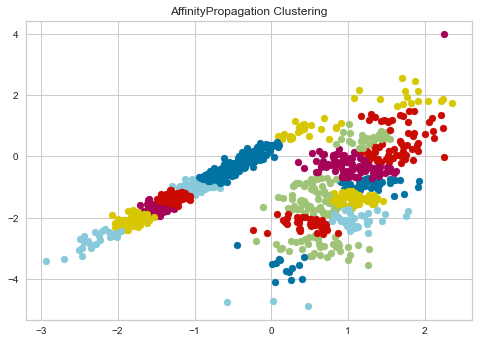

cluster analysis for method of AffinityPropagation Clustering
Estimated number of clusters: 25
Homogeneity: 0.968
Completeness: 0.220
V-measure: 0.359
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.354
Silhouette Coefficient: 0.384
========================== end of AffinityPropagation Clustering method =========================


In [12]:
# define affinity propagation clustering
affinity_propagation_clusters, affinity_propagation_predicted_label = affinity_propagation_clustering(X, y, damping=0.9)